In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

# K-Means

In [2]:
df = pd.read_csv("USArrests.csv").copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.index = df.iloc[:,0]

In [4]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [5]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [6]:
df = df.iloc[:,1:5]

In [7]:
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [8]:
#del df.index.name

In [9]:
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [10]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


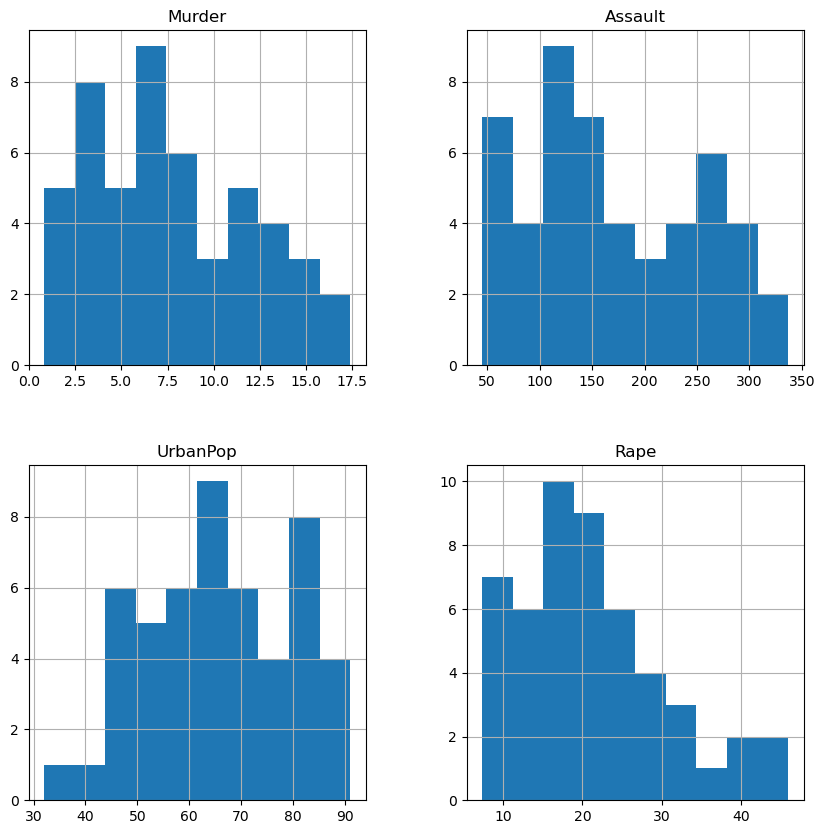

In [13]:
df.hist(figsize = (10,10));

## K-MEANS Model ve Görselleştirme

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [15]:
?kmeans

Type:        KMeans
String form: KMeans(n_clusters=4)
File:        c:\users\yusuf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

    For an example of how to choose an optimal value for `n_clusters` refer to
    :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall inertia. This technique speeds up             convergence. The algorithm implemented is "greedy k-means++". It             differs from the vanilla 

In [16]:
k_fit = kmeans.fit(df)

In [17]:
k_fit.n_clusters

4

In [18]:
k_fit.cluster_centers_

array([[ 11.3       , 209.71428571,  65.28571429,  24.77142857],
       [  4.16111111,  83.94444444,  57.77777778,  13.52777778],
       [ 12.13571429, 277.64285714,  68.78571429,  29.78571429],
       [  5.95454545, 152.        ,  74.27272727,  20.7       ]])

In [19]:
k_fit.labels_

array([0, 2, 2, 0, 2, 0, 1, 0, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       1, 2, 3, 1, 1, 2, 1, 3, 2, 2, 2, 1, 3, 3, 3, 1, 3, 2, 1, 0, 0, 3,
       1, 3, 3, 1, 1, 3])

In [20]:
#görsellestirme

In [21]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)

In [22]:
kumeler = k_fit.labels_

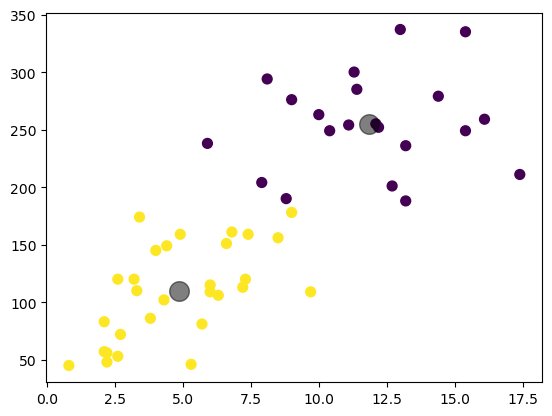

In [23]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

In [29]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
!pip install --upgrade matplotlib
import mpl_toolkits

In [32]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

In [33]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

<Figure size 1600x900 with 0 Axes>

In [28]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);

<Figure size 1600x900 with 0 Axes>

In [39]:
#kumeler ve gözlem birimleri

In [40]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [41]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,2
1,Alaska,2
2,Arizona,2
3,Arkansas,0
4,California,2
5,Colorado,0
6,Connecticut,1
7,Delaware,2
8,Florida,2
9,Georgia,0


In [42]:
df["kume_no"] = kumeler

In [43]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2


In [44]:
df["kume_no"] = df["kume_no"] + 1

In [45]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,3


# Optimum Kume Sayısının Belirlenmesi

In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df) 
visualizer.poof()  

In [50]:
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [51]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,3
1,Alaska,1
2,Arizona,1
3,Arkansas,3
4,California,1
5,Colorado,3
6,Connecticut,0
7,Delaware,3
8,Florida,1
9,Georgia,3


# Hiyerarşik Kümeleme

In [52]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [53]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

In [54]:
dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '

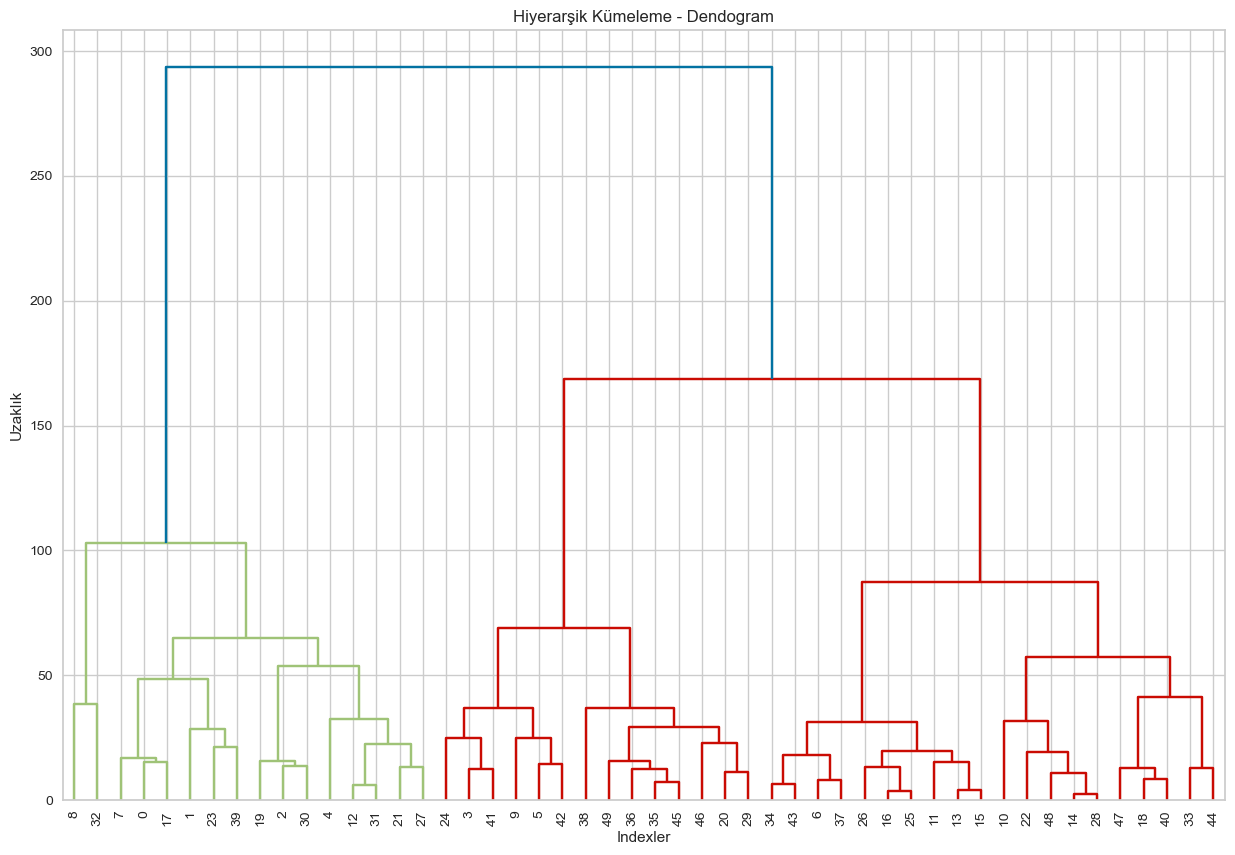

In [55]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

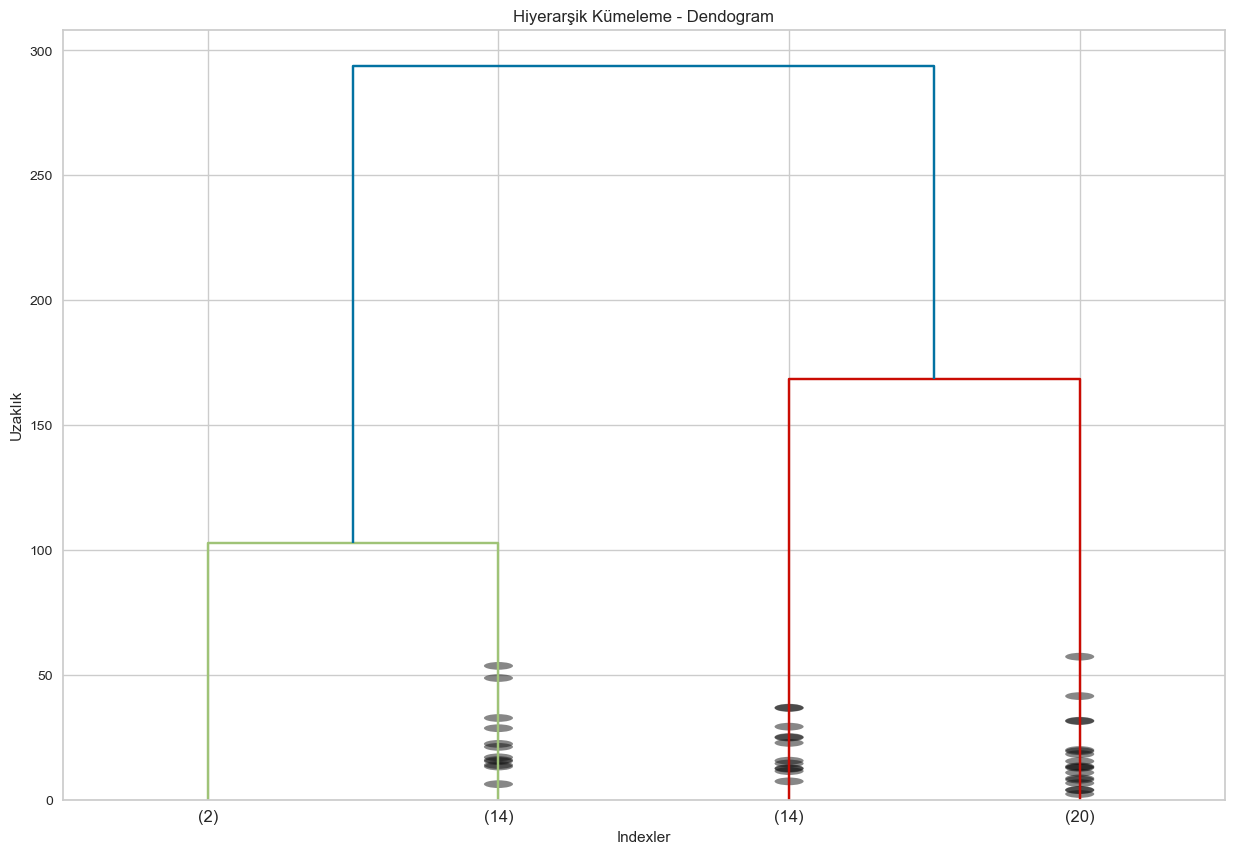

In [56]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

## Optimum Küme Sayısı

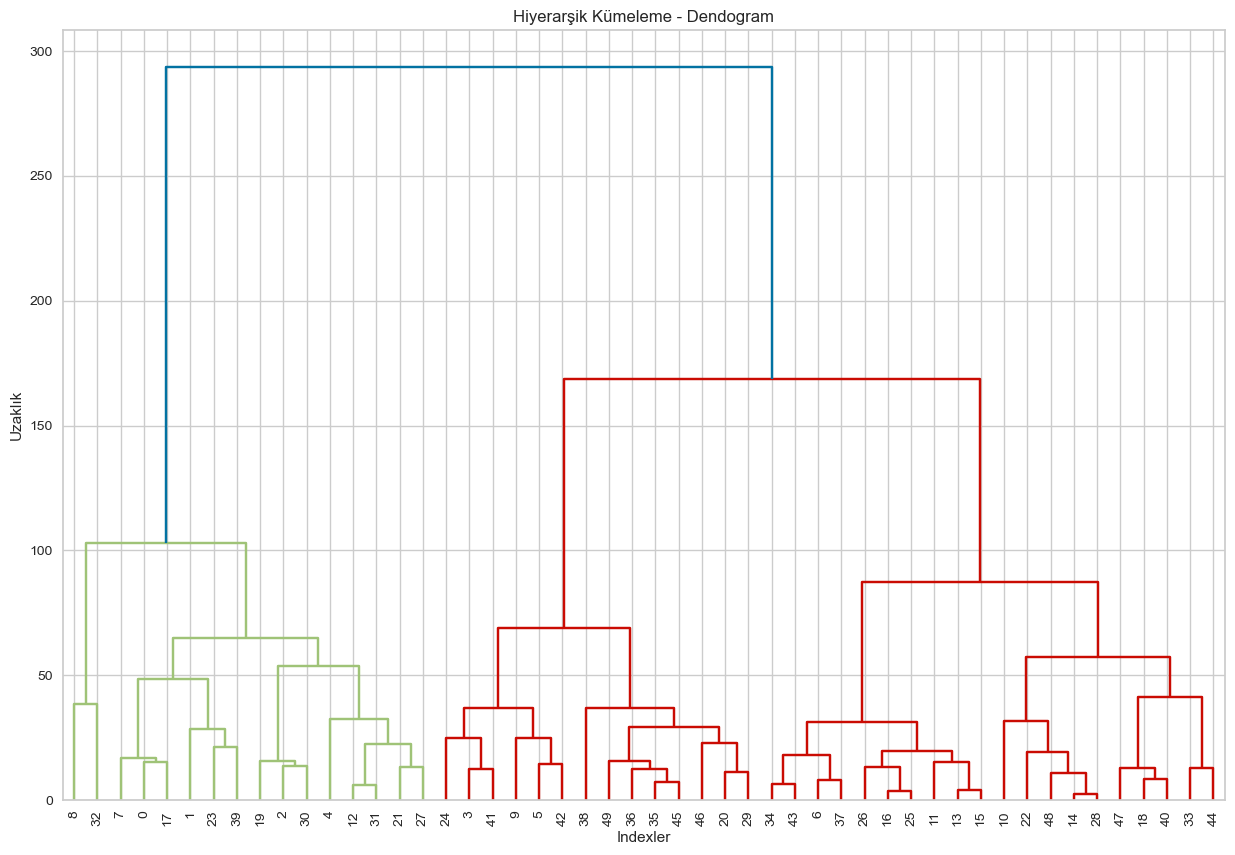

In [57]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
);

In [ ]:
?den

In [ ]:
?dendrogram

In [61]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  metric = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [62]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": cluster.fit_predict(df)})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [63]:
df["kume_no"] = cluster.fit_predict(df)

In [64]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


# PCA

In [65]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [66]:
from warnings import filterwarnings
filterwarnings('ignore')

In [67]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)
df[0:5,0:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)

In [75]:
bilesen_df = pd.DataFrame(data = pca_fit, 
                          columns = ["birinci_bilesen","ikinci_bilesen","ucuncu_bilesen"])

In [70]:
bilesen_df.head()

,birinci_bilesen,ikinci_bilesen,ucuncu_bilesen
0,0.985566,-1.133392,-0.444269
1,1.950138,-1.073213,2.040003
2,1.763164,0.745957,0.054781
3,-0.141420,-1.119797,0.114574
4,2.523980,1.542934,0.598557


In [71]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 ])

In [72]:
pca = PCA().fit(df)

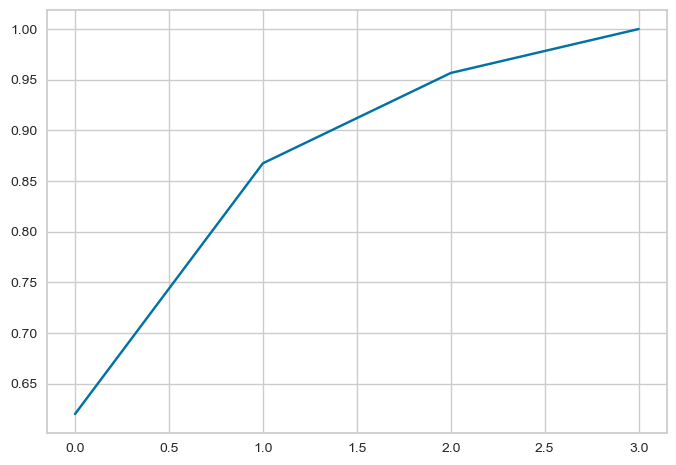

In [73]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))